<i>STATUS: Draft</i>

In [1]:
import numpy as np
import sympy as sp
import random  as rd
from IPython.display import IFrame
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

<h2>HTM Overview 1: Introduction to HTM, Bit Arrays & SDRs</h2>

Now that we have things all set up, let's start looking at HTM itself. For now, my general approach will be to follow along with the HTM School Videos. These are a fantastic resource, and I will also point to some other handy resources along the way. We will also build a number of the visualisations that appear in the HTM School Videos using Python to help gain an intuitition. 

Let's start at <b>Episode 0: HTM Overview</b> 

In [2]:
IFrame("https://www.youtube.com/embed/XMB0ri4qgwc", 600, 400)

This provides a really nice high level introduction to HTM. No coding is happening here. Some things to note from this video: 

* HTM is all about understanding how exactly the neocortex works and using this knowledge to build machines and solve problems. The neocortex is the sheet of cells that wraps around the top of the brain, and accounts for around 75% of the brain's mass. It has evolved in mammals, particularly humans. In alot of HTM resources, it is often described as an approximately 2.5mm thick, a kind of scrunched up sheet, inside the human skull, with similiar height and width to a dinner napkin. While there are many functions that human's undertake (such as eatings/sleeping/sex etc.) that are controlled from other parts of the brain, the neocortex holds things such as memories, a notion of identity, intelligence. The neocortex is sometimes referred to as the "seat of intelligence". 

* If you examine the neocortex under a microscope, it turns out that its cellular structure in different regions is almost identical. This suggests to us that however the neocortex might work, it seems to utilise a similar approach to processing regardless of different types of information it receives (such as visual, auditory, touch etc.). To put this another way, when the neocortex processes information, it appears to use the same algorithmic structure.

* The neocortex is made up of a <i>lot</i> of cells. In fact, an average human adult neocortex contains 20-30 billion cells, and the predominant type of cell is called a neuron. You can think of a neuron as a kind of 2-state machine, that is one of two states at any one time, and the states are defined by its level of electric voltage. A neuron will either be around -70 millivolts (which we can regard as being in an 'off' state), or is around 100 millivolts (which we can regard as being as being in an 'on' or 'firing' state). At any point time (leaving aside the issue that its a little problematic to define exactly what we mean by point in time) all neurons in the neocortext can be regarded as being in a state of either 'on' or 'off'.

* It also turns out that there is a remarkably small percentage of cells in the 'on' state at any time (usually only around 2% of the neurons). Some kind of notion of sparsity seems is critical in how the neocortex functions.

* The information that comes into the neocortex to be processed can be broadly seen in two categories: 

1. <i>Basic inputs that arrive into the neocortex which are a copy of the motor commands coming out of the old brain</i> <br/> These inputs are a copy of information that has been sent to control muscles, and comes into the neocortex in order for it to undertand how the body is interacting with the world
2. <i>Sensory input coming form the outside world</i><br/> This includes sensory inputs from touch, smell etc, from phenomena occuring in the outside world, all copied and sent into the neocortex, and comprising a representation of what is happening in the world at a given time. Cummulatively, this provides a sensory motor model, and allows the neocortex to have continuity in the way it experiences phenomena. 

This episode of HTM School also touches on the kinds of things that need to be in place if we were to attempt to create some kind of system that could function in an equivalent way to the neocortex. First, we would require a mechanism to convert incoming information into a format that the neocortex can deal with. The system would need a mechanism to convert information into a data structure that can be used. In HTM, we will end up creating a mechanism to do this called <b>Encoder</b>. The data structure that information is converted will be called a <b>Sparse Distributed Representation</b> or SDR. 

To make this all work, we would also need some mechanism to process multiple interacting SDRs, to somehow bring them all together into some kind of shared and malleable representation. In HTM, this mechanism will be called a <b>Spatial Pooler</b>. And finally, we will need a mechanism to understand and predict sequences of events so, like the neocortex, we might infer what what is about to happen, or reason about something based on information we have encountered. In HTM, this will be called the <b>Temporal Memory</b> Algorithm. 

To paraphrase all this, we might say that the purpose of a HTM system is to receive sensory information, encode it into an SDR structure, create a high level representation that takes into account the information across other SDRs using a Spatial Pooler, and allow the creation of predictive states and knowledge through a Temporal Memory Algorithm. This will be a system that is designed to learn continuously where there is no notion of a training set, no batch processing, and the model of the world can change as the data changes. This allows the HTM system to build predictive model of the world, and continously adapt. 

This episode introduces some specific terms in neuroscience, and it is probably a good idea to check out some related resources on this. For a good starting point, see the <i>Brains Explained</i> YouTube channel, especially the videos covering neuron basics (https://www.youtube.com/watch?v=eAbIWSPS1M4), the neocortex https://www.youtube.com/watch?v=x2mYTaJPVnc&t=511s, and the thalumus (https://www.youtube.com/watch?v=fki7AmLma_I). This will give you some initial intuitions around what neurons are (which are certainly far more complex than my description as a 2-state machine above), and how the neocortex is structured, and how information flows in this structure.

Let's keep on going with the HTM School videos, and now look at <b>Episode 1: Bit Arrays</b> 

In [3]:
IFrame("https://www.youtube.com/embed/Ub1fE-bAroA", 600, 400)

Note that Episode 1 in the HTM School series is not so much focused on HTM, rather it is a primer for working with bit array's, and encoding messages in strings of binary numbers. If you work across the computer science space where this comes up quite a bit, the advice is that this video could be skipped. Still, I still found it quite handy, and some things to note in this video are:  

* A bit here refers to a variable which can be used to encode the smallest atomic piece of information that can be stored in a computer: a variable that is set to either 1 or 0. This variable encodes a binary number, which can take on only 2 values, either 0 or 1. 

* You can think of the 0 or 1 as two states that a bit can be in (like an 'on/firing' or 'off' state in a neuron). Note that when bits are spoken about, different domain specific types of nomenclature are usually used: 1 or 0, on or off, true of false, etc. Whatever language is used, the value of bit tells us about its state in regard to the possible values it can take on. 

* It is possible to have an ordered list of bits, which you might visualise as something like <b>00110011</b>. This is called a <b>Bit Array</b>

* Bit Arrays are well suited to encode information. To demonstrate, this, consider that, if I have an 8 bit array and I and I can choose whether each bit could be in a state of 0 or 1, I would able create 256 unique 8 bit arrays (e.g., 00000000, 00000001, 00000011, etc). The math behind this is straight forward $2^8 = 256$, and we are simply saying that there are 256 ways to arrange 8 values where each value can have a 0 or 1. 

* There are some basic operations that can take place with bit arrays such as <b>AND</b>, <b>OR</b> and <b>NOT</b>. Each of these can be thought of a function that takes two bit arrays, and returns one bit array. There is also a <b>NOT</b> operation that takes 1 bit as an input and returns 1 bit. We can think of these functions as: 

<br/><b>AND (bitArray1, bitArray2)</b>:<br/>
Takes two bit arrays as args, and returns a bit array where that has only those bits where 1s appear in both. The result is also called an <i>intersection</i> of two given bit arrays <br/>
<i>Example</i><br/>
$ \text{AND}(00110011, 00111000) = 00110000 $

<br/><b>OR (bitArray1, bitArray2)</b>:<br/>
Takes two bit arrays as args, and returns a bit array where the bits those bits where 1s appear in bitArray1 or bitArray2. The result is also called an <i>union</i> of two given bit arrays <br/>
<i>Example</i><br/>
$ \text{OR}(10110011, 01110011) = 11111011 $


<br/><b>XOR (bitArray1, bitArray2)</b>:<br/>
Takes two bit arrays as args, and returns a bit array where each of the corresponding bits, must be bitArray1 or bitArray2. The result is also called an <i>union</i> of two given bit arrays <br/>
<i>Example</i><br/>
$ \text{OR}(10110011, 01110011) = 11000000 $


<br/><b>NOT (bitArray1)</b>:<br/>
Takes two bit arrays as args, and returns a bit array where <br/>
<i>Example</i><br/>
$ \text{NOT}(00110011) = 11001100 $

Note that the nomenclature that tends to surround bit arrays, (which can include but is not limited to bits, bytes, binary numbers, booleans, logic gates, etc, which are all kind of the same but not really), can make what should be straightforward a little opaque at times. For our immediete purposes, we are only going to be concerned with AND and OR operations, but the deeper we dig into HTM and the critical SDR data structure, we will encounter issues related to to some of these operations, and we will need to explore the underlying mathematics a little more. 

To gain a deeper understanding of all this, and the best resource I have come across is  Norman Wildberger's YouTube series on Boolean Logic: <a href="https://www.youtube.com/watch?v=UcjKKcvv7Rw&list=PLIljB45xT85CnIGIWb7tH1F_S2PyOC8rb">https://www.youtube.com/watch?v=UcjKKcvv7Rw&list=PLIljB45xT85CnIGIWb7tH1F_S2PyOC8rb</a>, that brings the various way that all of this exists across different displines and puts all under a rigorous lens of linear algebra. 

With that primer our of the way, let's move on to <b>Episode 2: SDR Capacity & Comparison</b> 

In [4]:
IFrame("https://www.youtube.com/embed/ZDgCdWTuIzc", 600, 400)

From Episode 2, we start to get into more specific ideas that underpin HTM systems. Matt does a really cool opening to this video, discussing the experience of considering what happens when we play a musical istrument. He discusses the the complex feedback mechanism that allows the neocortex to deal with recieving input information (such as auditory and motor input) and how it is involved in also planning the music you are about to play, and how this information is fed to into the various regions of the neocortex. This kind of task, listening to and playing music, is a really nice example of something that is just so complicated, and yet the neocortex can make it work.

Some important things to note in this video: 

* It introduces some important nomenclature around the characteristics of bit arrays. The first of these is <b>population</b>, which denotes the count of how many non-zero values are in a given bit array, and <b>size</b> refers to the total count of bits in a bit array. In HTM, population is often denoted as $w$ and size is often denoted as $n$. As an example, the bit array 00110011 has a population of 4 and size of 8 ($w = 4, n = 8$). 

* The term population is also synonomous with the <b>active bits</b> of a bit array. This term of 'active bits' seems to predominate through the related HTM literature. This concept is also related to the 'hamming weight', though this does not really turn up in the related literature.

* The number of active bits in a given bit array is of critical importance in HTM. For example, 00111111 has more active bits (or a greater population) than 00000011. This difference is often qualitatively described in terms of a measure of sparsity (meaning a bit-array having few active bits realtive to its size) or density (a bit array having many active bits relative to its seize) to describe bit arrays with predominantly zeros or  predominantly ones. A simple quanatitative metric is also associated with this, which is called a measure of sparsity, being the percentage of active bits in an array: 
<br/>
$$ \frac{\text{active bits}}{\text{size}} \times 100$$
<br/>
So for example, in a bit array of size 256, where 6 bits are active (where $w=6$ and $n=256$), this sparsity metric is just over $2%$. Given such a percentage of active bits, we would say it is a sparse array.  
<br/>

* The idea of sparsity in HTM is such an important idea that the term bit array is usually reframed into the concept of a <b>Sparse Distributed Array</b>, meaning a bit array which has the characteristic of having a low number of active bits relative to its size. This data structure plays a big part in HTM, being used across multiple parts of the underlying HTM algorithms. 

* There is a important notion of semantic similiarity that exists between given SDRs, which will also become a critical idea for us as we move forward. We say that an SDR is more similiar to another SDR, when they shares same value (either a 0 or 1) in the same position. of of the SDRs. For example, an SDR comprised of the bits 00000001 and a second SDR comprised of the bits 00000001 are semantically identical. As a second example, the SDR  000000001 is more semantically similiar to a second SDR 00000011 than it is to the SDR 11110011, because the first and second SDRs have more instances of the same value (either 0 or 1) at each position. 

It is straightforward to create this type of structure in Python. Here is an example of an SDR with $n = 256$, and $w = 8$:

In [5]:
a = np.zeros(256)
a[248:] = 1
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

To extend our intuition around all this, let's build one of the HTM School visualisations. It will give us more of a sense of how it works, and we can use it future HTM school videos.

To do this, first let's write some code create an SDR. Note that I am going to build a class for this, because an SDR is an object that should be able to exhibit attributes such as input space size, number of active bits, etc, and using an array like the one above does not capture some of this nuance. Also, its alot of overhead to create an object like the one above, with all those zeros. It makes more sense to create a smaller list which would just include those indices across the array that have been set to 1. Finally, I will also allow the class to denote a label for the SDR which be handy later on: 

In [6]:
def createRandomisedSdr(size, numberOfActiveBits):
    sdr = set()
    while len(sdr) < numberOfActiveBits:
        sdr.add(np.random.randint(low=1, high=size))

    return(list(sdr))

class SDR:
    def __init__(self, size, numberOfActiveBits, label):
        self.size = size
        self.numberOfActiveBits= numberOfActiveBits
        self.activeBits = createRandomisedSdr(self.size, self.numberOfActiveBits)
        self.label = label
    
    def getSummary(self):
        print("----------------- SUMMARY -------------------------")
        print("|L1| Label:", self.label)
        print("|L1| Input space size of SDR:", self.size)
        print("|L2| Number of active bits in SDR:", self.numberOfActiveBits)
        print("|L3| Percentage of active bits:", (self.numberOfActiveBits / self.size) * 100, "%")
        print("|L3| Active bits:", self.activeBits)
    
    def overWriteActiveBits(self, updatedActiveBits):
        self.activeBits = updatedActiveBits

Let's try it out, and print a summary of what is created:

In [7]:
size = 1024
active_bits = 32

s1 = SDR(size, active_bits, "SDR1")
s1.getSummary()

----------------- SUMMARY -------------------------
|L1| Label: SDR1
|L1| Input space size of SDR: 1024
|L2| Number of active bits in SDR: 32
|L3| Percentage of active bits: 3.125 %
|L3| Active bits: [5, 390, 647, 136, 649, 654, 527, 274, 918, 280, 158, 932, 549, 47, 825, 697, 62, 834, 325, 583, 73, 975, 981, 85, 731, 98, 104, 758, 1015, 378, 379, 254]


Now let's create a few visualisation$^1$ function, just to take this list of indices that each represent active bits and convert to a coordinates that I could plot with Matplotlib: 

In [8]:
def compute_multiples(n):
    result = set()
    for i in range(1, int(n ** 0.5) + 1):
        div, mod = divmod(n, i)
        if mod == 0:
            result |= {i, div}
    result_as_list = list(result)
    result_as_list.sort()
    return(result_as_list)

def compute_middle_factors(n): 
    if n < 20:
        print("The chosen SDR size is too small and does not make sense to visualize in this way")
        return
    result = compute_multiples(n)
    
    is_prime = len(result) == 2
    if is_prime:
        print("Prime number SDR sizes not supported")
        return
    if len(result) < 5:
        print("There are only" , len(result), "factors of", n, " so the dimensions grid will be unbalanced. Better to choose a different sdr_size")
    if sp.ntheory.primetest.is_square(n):
        dim_one = result[sp.floor(len(result) / 2)]
        dim_two = dim_one
    else:
        dim_one = result[sp.floor(len(result) / 2) - 1]
        dim_two = result[sp.floor(len(result) / 2)]


    return [dim_one, dim_two]



def convert_sdr_to_tuple_for_visualisation(sdr, sdr_size): 
    counting_offset = 1
    m = np.zeros(sdr_size)
    for i in sdr:
        m[i] = m[i] + 1
    
    dimensions = compute_middle_factors(sdr_size)

    if dimensions == None:
        return
    d = np.reshape(m, [int(v) for v in dimensions])
    v = np.where(d == 1)
    
    
    coords = [(v[1][i], (dimensions[1] - counting_offset) - v[0][i]) for i in range(len(v[1]))]

    
    return(coords)

Let's pass our SDR into this, and get some coordinates to plot. Here are first 5 coordinates:

In [9]:
s2 = convert_sdr_to_tuple_for_visualisation(s1.activeBits, size)
s2[0:5]

[(5, 31), (15, 30), (30, 30), (9, 29), (21, 29)]

Finally, let's plot it. We will also create a function to format our axis in Matplotlib: 

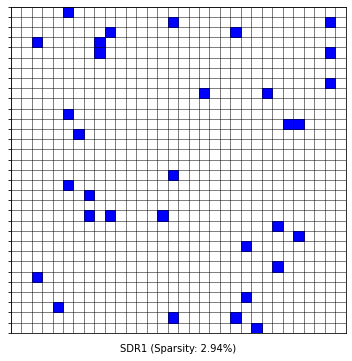

In [10]:
def create_axis_for_sdr(ax, x_limit, y_limit, population, label, create_label = True):
    
    if create_label:
        label_add = np.round((population / (x_limit * y_limit)) * 100, 2)
        label = label + ' (Sparsity: {}%)'.format(label_add)
        ax.set_xlabel(label)
        
    ax.set_xticks(range(int(x_limit)))
    ax.set_yticks(range(int(y_limit)))
    [ax.xaxis.get_major_ticks()[i].tick1line.set_color("white") for i in range(int(x_limit))]
    [ax.yaxis.get_major_ticks()[i].tick1line.set_color("white") for i in range(int(y_limit))]
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(color='k', linestyle='-', linewidth=.5)
    ax.tick_params(axis = "both", which = "both", bottom = False, top = False)

    
    return(ax)


fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
ax1 = create_axis_for_sdr(ax1, np.sqrt(size) + 1, np.sqrt(size) + 1, active_bits, s1.label)
SDR1 = [ax1.add_patch(Rectangle(s2[i], 1, 1, color="blue")) for i in range(len(s2))]

So what is this visualisation telling us? It displays an SDR that have been randomly intitialised with just under $3\%$ of active bits. If I were to create this again, I would just get some other random SDR.

One way to think of this, is that this SDR created with random bits, could represent some arbitrary piece of information. If I create a second SDR, I can use that to represent some other arbitrary piece of information. Note however that we have also introduced a semantic dimension to all this, and this set up we are saying that similiar SDRs (those wich have alot of bit values which are the same) are actually semantically similiar. 

A natural question that arises from all this is around <b>capacity</b>. In the context of the above example, this asks, how many ways are there to arrange 32 active bits and an SDR of size of 1024. This would tell me how many pieces of information this SDR could hold hold. 

This is a straight forward question question combinatorics, and this number is also known the <b>binomial coeffient</b>, and turns up everywhere in mathematics. It can be denoted as:  

$$\binom{n}{w}$$ 

Let's use the SymPy library in Python to calculate an example: 

In [11]:
sp.binomial(4, 2)

6

A nice inutition for this is to imagine you have a game board with a grid of four spaces. You have two discs that can place in any combination across the 4 spaces. How many different combinations are there? That would be 6. 

As an aside, remember above when we introduced bit arrays and I said there "if I have an 8 bit array and I and I can choose whether each bit could be in a state of 0 or 1, I would able create 256 unique 8 bit arrays (e.g., 00000000, 00000001, 00000011, etc)"? In terms of the binomial coeffiecient, this what I am doing is seeing all the ways I could arrange 0 things, plus all the ways I could arrange 1 thing, plus all the ways I could arrange 2 things, and so on (giving me all the possible combinations). The computation for this would be: 

In [12]:
sp.binomial(8, 0) + sp.binomial(8, 1) + sp.binomial(8, 2) + sp.binomial(8, 3) + sp.binomial(8, 4) + sp.binomial(8, 5) + sp.binomial(8, 6) + sp.binomial(8, 7) + sp.binomial(8, 8)  

256

The thing to note about all this is that, as the number of spaces grows, this number will get big really quickly. Consider if we used the specifications above, and wanted to know how many ways I could arrange 32 things in 1024 spaces

In [13]:
sp.binomial(1024, 32)

4975934516475091945873053437980096233985625508261827213576160

However we might articulate this number (and maybe the best way is just via scientific notation as $4.975934516475092e+60$) it is clear that for us it is a big number, and not really even imaginable. It's not quite the number of atoms in the known universe (which one could arguably put around $10^{78}$) but it is big, relative to how humans conceive numbers. 

Generally in HTM, its normal to work with a size up to $n = 65000$ with a $2\%$ capacity (let's say approximately 1300). So if we did this, how many unique SDRs might we be able to create?

In [14]:
str(sp.binomial(65000, 1300))

'405771486507482326157958196844594547311251156691794099541779943697348732532649154205636291938522406209808755229744031014820081239313551961586741608198485194832686377803078876182860025125806767904102331980018699162482934638902094494634331697906824041435602372675688661536471519795858611770163637086955034268669450464012038907135059035635996482414195189901966385782444759898075361005418169021306130115509613658280141264064411334078888436227520108979219963628138779488564958699083400242821750065593574061789935512471425078653429469848624727788421204335611819437863136764028826578104166719534245642339449986238434664841884857146521241772840982707804723402405677926834648744917056671966807400173502728748912796444561071112531700241807235923767262982657659952687445261702715501633709193701093119218205548464330396962673232120994956862305009951286252613029185680134700366545358675501705611035859950140096231335676263416861622919110841048295739014268116292444097498303389977997444545082320103799412795070385

Again, this number is big, so big its kind of meaningless to us, and in this case is certainly bigger than the number of atoms in the known universe. But this also tells us about the amazing capacity SDRs have in storing discrete pieces of information. Of course, the composition of these discrete pieces of information is just the location of ones and zeros, and eventually we will need to deal with how to translate that into the kinds of more information that our neocortex seems to be able to cope with.

<b>Comparing SDRs</b>

SDRs become far more interesting when we start to consider them in comparison with each other. So let's say I choose 2 randomly created SDRs out of all the SDRs I cold possible choose (that really big number above), and I compare these 2 SDRs in some way. Later, we will look at some more complicated comparison metrics but for now let's just consider how the 2 SDRs I have chosen may relate to each other through which of their active bits are the same, or <b>overlap</b>. The overlap metric that tells me how many active bits that two SDRs have in common. I will do this be creating a function that tells all the bits that are the same (which is the AND() function above, also called the interesection) in both SDRs. I will also build in to this fucntion an OR() operation (also called the union) as we will need it soon:

In [15]:
def computeUnionAndOverlap(SDR1_on_bits, SDR2_on_bits):
    union = list(set(SDR1_on_bits).union(SDR2_on_bits))
    overlap = list(set(SDR1_on_bits).intersection(SDR2_on_bits))
    
    return({"union": union, "overlap": overlap})

Let's try it out. I will create 2 randomonly initialised SDRs, and a third that computes thier union and overlap, and then plot everything. For the purposes of showing union and overlap, I will push the sparsity up to just under $10\%$:

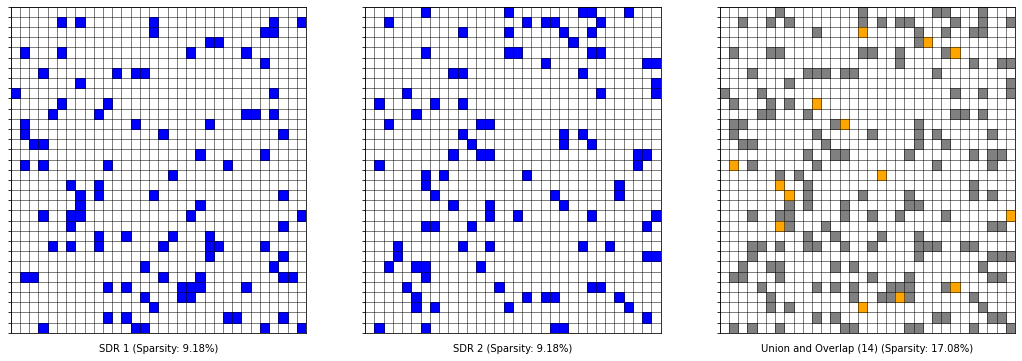

In [16]:
size = 1024
activeBits = 100

s1 = SDR(size, activeBits, "SDR1")
s2 = SDR(size, activeBits, "SDR2")
s3 = computeUnionAndOverlap(s1.activeBits, s2.activeBits)

v1 = convert_sdr_to_tuple_for_visualisation(s1.activeBits, size)
v2 = convert_sdr_to_tuple_for_visualisation(s2.activeBits, size)
v3 = convert_sdr_to_tuple_for_visualisation(s3['union'], size)
v4 = convert_sdr_to_tuple_for_visualisation(s3['overlap'], size)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1 = create_axis_for_sdr(ax1, np.sqrt(size) + 1, np.sqrt(size) + 1, len(s1.activeBits), "SDR 1")
ax2 = create_axis_for_sdr(ax2, np.sqrt(size) + 1, np.sqrt(size) + 1, len(s2.activeBits), "SDR 2")
ax3 = create_axis_for_sdr(ax3, np.sqrt(size) + 1, np.sqrt(size) + 1, len(s3['union']), "Union and Overlap (" + str(len(s3['overlap'])) + ")")
SDR1 = [ax1.add_patch(Rectangle(v1[i], 1, 1, color="blue")) for i in range(len(v1))]
SDR2 = [ax2.add_patch(Rectangle(v2[i], 1, 1, color="blue")) for i in range(len(v2))]
SDR3 = [ax3.add_patch(Rectangle(v3[i], 1, 1, color="gray")) for i in range(len(v3))]
SDR1 = [ax3.add_patch(Rectangle(v4[i], 1, 1, color="orange")) for i in range(len(v4))]

The first and second SDRs have been randomly initialised. The third, shows the union of both SDRs togehter (the squares in gray) and and active bit overlaps (in orange). As we might expect, the overall sparsity has increased and total number of active bits is now just under $18\%$. 

We are mostly interested in this orange squares, that display the active bits that overlap from the the first and second SDR. We call the count of orange squares the <b>overlap score</b> and that is listed in the label in brackets

Of course, this comparison is only being made between two SDRs out of an awful lot of other other possible SDRs above (for this chosen size of 1024 and number of active bits set at 100, there are around $7.746624668043452e+140$). It is worth checking to see if this particularly overlap score is a good representation of how SDRs in the size space might generally overlap. Let's do this by doing same thing over 100,000 iterations, just to get a sense of how our overlap scores are moving around. Note that if you are executing the code in the notebook, this will take a while:  

In [17]:
def createAndCompareSDRsOverMultipleIterations(iterations, size, population):
    sdr_unions_for_comparison = []
    sdr_overlaps_for_comparison = []
    for x in range(iterations):
        SDR1 = SDR(size, activeBits, "SDR1")
        SDR2 = SDR(size, activeBits, "SDR2")
        sdr_comparison = computeUnionAndOverlap(SDR1.activeBits, SDR2.activeBits)
        sdr_unions_for_comparison.append(len(sdr_comparison['union']))
        sdr_overlaps_for_comparison.append(len(sdr_comparison['overlap']))
    print("Average union: ", str(sum(sdr_unions_for_comparison) / len(sdr_unions_for_comparison)))
    print("Average overlap: ", str(sum(sdr_overlaps_for_comparison) / len(sdr_overlaps_for_comparison)))
    return({"union_comparison": sdr_unions_for_comparison, "overlap_comparison": sdr_overlaps_for_comparison})


In [18]:
comparisons = createAndCompareSDRsOverMultipleIterations(1000, 1024, 100)

Average union:  190.251
Average overlap:  9.749


So this looks like promising. After running it 100,000 times we get an overlap score average that is pretty close to the first one we did. The function also returned all the overlap scores and we can plot them as a histogram too: 

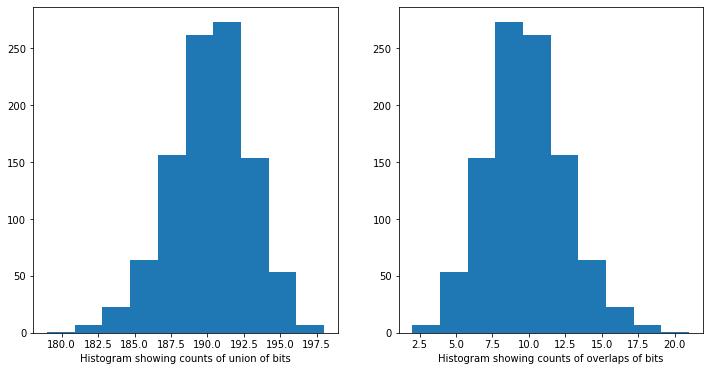

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_xlabel("Histogram showing counts of union of bits")
ax2.set_xlabel("Histogram showing counts of overlaps of bits")
p1 = ax1.hist(comparisons['union_comparison'])
p2 = ax2.hist(comparisons['overlap_comparison'])

Again, this feels like what we would expect, and is really just a consequence of the binomial coefficient - there are more ways to get random bits that come toward some number close to 9, and the other values will will be normally distribution.

<b>Matching SDRs</b><br/>

In HTM, the idea of a <b>match</b> between 2 SDRs is when they have some count of overlapping bits, based on some <b>match threshhold</b>, and arbitrary number that we set. So let's say we have 2 SDRs and set a match threshold at .9. This would mean that if $90\%$ of the active bits in both SDRS overlap, we have a match . Or perhaps we might set this at .1, meaning that if $10\%$ of active bits in both SDRs overlap, we have a match. Let's create a function to do this:  

In [20]:
def computeMatch(SDR1, SDR2, size, matchThreshold):
    match = {}
    match['overlap'] = len(computeUnionAndOverlap(SDR1.activeBits, SDR2.activeBits)['overlap'])
    match['overlapAsPercentageOfSDRSize'] = (match['overlap'] / size) * 100
    match['isMatch'] = matchThreshold < (match['overlapAsPercentageOfSDRSize'])
    
    return(match)

Now create some SDRs and see if we consider if they match based on a matching criteria we will provide of $10\%$:

In [21]:
size = 2048
activeBits = 100
matchingThreshold = 0.1

s1 = SDR(size, activeBits, "SDR1")
s2 = SDR(size, activeBits, "SDR2")

In [22]:
computeMatch(s1, s2, size, matchingThreshold)

{'overlap': 9, 'overlapAsPercentageOfSDRSize': 0.439453125, 'isMatch': True}

So for s1 and s2, they have 6 bits that overlap, or .29%. This is above our matching threshold of .1% 

<b>Noise tolerance of SDRs</b><br/>

Finally, let's consider one more question: if I have two randomly created SDRS, and then randomly change some bits in each of the SDRs (meaning that I randomly turn some zeros to ones, and randomly turn some ones to zeros in one of the SRDs), how will our match threshold be affected?

Put another way, if we find that we can flip a substantial number of the bits in an SDR and still meet a match threshold, this would suggest that the ability to create matches between SDRs is quite tolerant to noise.

To explore this, first let's create a function to randomly flip bits in a given SDR:

In [23]:
def randomlyFlipPercentageOfBits(SDRChoice, size, percentageOfBitsToFlip):
    rd.shuffle(SDRChoice.activeBits)
    countOfBitsToBeFlipped = int(percentageOfBitsToFlip * len(SDRChoice.activeBits))
    newSDR = SDRChoice.activeBits[countOfBitsToBeFlipped:]  
    noise = SDR(size, countOfBitsToBeFlipped, 'dd')
    SDRWithNoise = noise.activeBits + newSDR
    return(SDRWithNoise)

We have 2 SDRs already set up (s1 and s2), and they are match based on the threshold we have set above. Let's use our new function to randomly flip $40\%$ of bits in s1, and see if there is still a . First get a version of the active bits in s1 with some noise:

In [24]:
s1ActiveBitsWithNoise = randomlyFlipPercentageOfBits(s1, size, .4)
print(s1.activeBits)
print(s1ActiveBitsWithNoise)

[1277, 1137, 1609, 19, 847, 1553, 1745, 671, 730, 1077, 345, 588, 1030, 1358, 984, 1891, 1804, 1750, 199, 637, 2020, 112, 1996, 1768, 120, 711, 782, 448, 369, 1090, 445, 387, 982, 307, 258, 890, 1351, 1372, 149, 1138, 593, 1644, 980, 297, 952, 1122, 1845, 487, 1335, 1973, 1956, 385, 1676, 1718, 1765, 1247, 1309, 431, 1864, 1986, 1721, 1354, 118, 290, 615, 1293, 266, 1024, 1021, 1318, 1603, 1625, 1096, 379, 45, 29, 1426, 1502, 1381, 132, 425, 1806, 86, 9, 1009, 629, 1762, 1844, 1418, 1880, 677, 1283, 814, 1555, 506, 1588, 930, 665, 1868, 1078]
[1152, 137, 523, 1422, 1299, 1942, 1046, 407, 1696, 289, 1955, 1962, 1324, 1076, 308, 1463, 1468, 701, 1982, 703, 1983, 1606, 73, 1994, 842, 1105, 1109, 598, 855, 600, 1366, 857, 854, 97, 1388, 240, 1521, 1396, 502, 1919, 593, 1644, 980, 297, 952, 1122, 1845, 487, 1335, 1973, 1956, 385, 1676, 1718, 1765, 1247, 1309, 431, 1864, 1986, 1721, 1354, 118, 290, 615, 1293, 266, 1024, 1021, 1318, 1603, 1625, 1096, 379, 45, 29, 1426, 1502, 1381, 132, 425, 1

We can see that the first $40\%$ of these active bits have been randomly changed (just 40 out of 100 bits). Now let's overwrite s1 with active bits that have the noise:

In [25]:
s1.overWriteActiveBits(s1ActiveBitsWithNoise)
s1.getSummary()

----------------- SUMMARY -------------------------
|L1| Label: SDR1
|L1| Input space size of SDR: 2048
|L2| Number of active bits in SDR: 100
|L3| Percentage of active bits: 4.8828125 %
|L3| Active bits: [1152, 137, 523, 1422, 1299, 1942, 1046, 407, 1696, 289, 1955, 1962, 1324, 1076, 308, 1463, 1468, 701, 1982, 703, 1983, 1606, 73, 1994, 842, 1105, 1109, 598, 855, 600, 1366, 857, 854, 97, 1388, 240, 1521, 1396, 502, 1919, 593, 1644, 980, 297, 952, 1122, 1845, 487, 1335, 1973, 1956, 385, 1676, 1718, 1765, 1247, 1309, 431, 1864, 1986, 1721, 1354, 118, 290, 615, 1293, 266, 1024, 1021, 1318, 1603, 1625, 1096, 379, 45, 29, 1426, 1502, 1381, 132, 425, 1806, 86, 9, 1009, 629, 1762, 1844, 1418, 1880, 677, 1283, 814, 1555, 506, 1588, 930, 665, 1868, 1078]


Now let's see if we still get a match between s1 and s2 with s1 having $40\%$ of bits flipped: 

In [26]:
computeMatch(s1, s2, size, matchingThreshold)

{'overlap': 8, 'overlapAsPercentageOfSDRSize': 0.390625, 'isMatch': True}

So we still get a match! We will need to think of this in a more rigorous way, and will do that in the next notebook, but for now, be aware that if we compare SDRs to one another and find that they share some kind of similiarity, this similiarity seems to get retained in the face of alot of noise (i.e. when a proprotion active bits in the SDRs being changed). This really just comes out of the underlying math: that when we have a match, that match is susceptible to noise because of the astronically large amount of possibilities and the fact we are have found a match. It turns out that, even when you dial the noise up to 50%, there is hardly any chance of a false positive (meaning a match before noise stays a match after noise, a non-match before noise stays a non-match). 

The takeaway - SDRs have massive resistance to noise.

Finally, note that HTM, this idea of an overlap threshold is often denoted as $\theta$, and to gain an intuition, you should experiment with changing this, or run many iterations to see how it behaves. I will leave this to you. 

<hr/>

<i>Footnotes</i>
1. Note that this visualisations tends to suggest a slight conflation between arrays and matrices, and what we are really looking at here is an array, just wrapped our into grid to make it easier to look at. However, some of the distance functions that are used in the some of literature tend to maintain this conflation, and we will need to clarity this when we get deeper into things.

<div style="background:#99ddff; color:black; padding: 10px">
    <b>Add to these notes:</b><br/>
    I find it easier to learn things when I just create a tutorials, mostly so I have something nicely written up that I can come back to and make sense of. Inevitably I imagine there will be some mistakes here and there, and I am often just fixing up small things in my notes. But if find any inconsistencies, please let me know or just send a pull-request.
</div>